# Madrid / Spain - Sports / Athletics

Data source:

- https://es.fcstats.com/tabla,primera-division-espana,19,1,2622.php

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
# 1) I load the football data of the last 11 seasons

df_2019_20 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,2622.php')[0]
df_2018_19 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,2300.php')[0]
df_2017_18 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,2032.php')[0]
df_2016_17 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,1712.php')[0]
df_2015_16 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,1362.php')[0]
df_2014_15 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,1070.php')[0]
df_2013_14 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,692.php')[0]
df_2012_13 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,470.php')[0]
df_2011_12 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,72.php')[0]
df_2010_11 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,71.php')[0]
df_2009_10 = pd.read_html('https://es.fcstats.com/tabla,primera-division-espana,19,1,70.php')[0]

# And create a list of the dataframes
dfs = [df_2009_10, df_2010_11, df_2011_12, df_2012_13, df_2013_14, df_2014_15, df_2015_16, df_2016_17, df_2017_18,
       df_2018_19, df_2019_20]

In [4]:
# 2) Some data cleaning and structuring

season1 = 2009
season2 = 2010

for i in dfs:
    # Rename the columns
    i.columns = ['Pos.', 'Team', 'Total games', 'W', 'T', 'L', 'G+', 'G-', 'Points', 'Forma']
    # Drop useless columns
    i.drop('Forma', axis = 1, inplace = True)
    # Set a new index (position)
    i.set_index('Team', inplace = True)
    # Calculate some new interesting columns
    i['%W'] = i['W'] / i['Total games']
    i['Diff'] = i['G+'] - i['G-']
    
    # Tag the season data
    season = str(season1) + '-' + str(season2)
    i['Season'] = season
    season1 += 1
    season2 += 1

In [5]:
# 3) I collect the data of interest for the teams that I'm interested in
# Real Madrid, FC Barcelona, Atlético Madrid, Sevilla, Athletic Bilbao

RMA_d = {'Pos': [], 'Goals': [], '%W': []}
BCA_d = {'Pos': [], 'Goals': [], '%W': []}
ATM_d = {'Pos': [], 'Goals': [], '%W': []}
SEV_d = {'Pos': [], 'Goals': [], '%W': []}
ATB_d = {'Pos': [], 'Goals': [], '%W': []}

for i in dfs:
    RMA_d['Pos'].append(i.loc['Real Madrid']['Pos.'])
    RMA_d['Goals'].append(i.loc['Real Madrid']['Diff'])
    RMA_d['%W'].append(i.loc['Real Madrid']['%W'])
    
    BCA_d['Pos'].append(i.loc['FC Barcelona']['Pos.'])
    BCA_d['Goals'].append(i.loc['FC Barcelona']['Diff'])
    BCA_d['%W'].append(i.loc['FC Barcelona']['%W'])
    
    ATM_d['Pos'].append(i.loc['Atlético Madrid']['Pos.'])
    ATM_d['Goals'].append(i.loc['Atlético Madrid']['Diff'])
    ATM_d['%W'].append(i.loc['Atlético Madrid']['%W'])
    
    SEV_d['Pos'].append(i.loc['Sevilla']['Pos.'])
    SEV_d['Goals'].append(i.loc['Sevilla']['Diff'])
    SEV_d['%W'].append(i.loc['Sevilla']['%W'])
    
    ATB_d['Pos'].append(i.loc['Athletic Bilbao']['Pos.'])
    ATB_d['Goals'].append(i.loc['Athletic Bilbao']['Diff'])
    ATB_d['%W'].append(i.loc['Athletic Bilbao']['%W'])

<IPython.core.display.Javascript object>


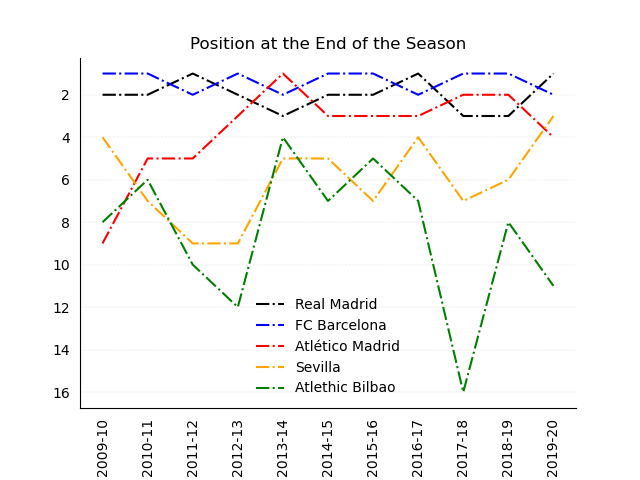

In [11]:
# 4) Plots

# 4.1) I plot the positions at the end of every season for these five teams

fig, ax = plt.subplots()

plt.plot(RMA_d['Pos'], '-.', c = 'black')
plt.plot(BCA_d['Pos'], '-.', c = 'blue')
plt.plot(ATM_d['Pos'], '-.', c = 'red')
plt.plot(SEV_d['Pos'], '-.', c = 'orange')
plt.plot(ATB_d['Pos'], '-.', c = 'green')

plt.gca().invert_yaxis()

plt.legend(['Real Madrid', 'FC Barcelona', 'Atlético Madrid', 'Sevilla', 'Atlethic Bilbao'], 
           loc = 0, frameon = False)
plt.tick_params(top = False, bottom = False, left = False, right = False,
                labelleft = True, labelbottom = True)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(np.arange(11), ['2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
           '2018-19', '2019-20'], rotation = '90')

plt.subplots_adjust(bottom = 0.15)

plt.title('Position at the End of the Season')

plt.grid(color='lightgrey', linestyle='-.', linewidth=0.25, axis = 'y')

<IPython.core.display.Javascript object>


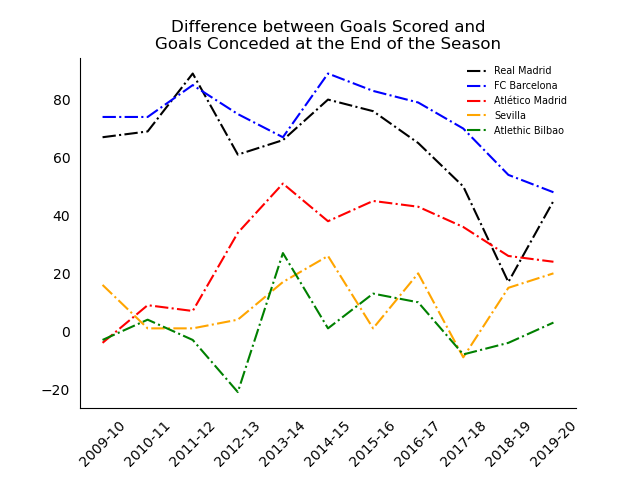

Text(0.5, 1.0, 'Difference between Goals Scored and\nGoals Conceded at the End of the Season')

In [7]:
# 4.2) I plot the goals difference

fig, ax = plt.subplots()

plt.plot(RMA_d['Goals'], '-.', c = 'black')
plt.plot(BCA_d['Goals'], '-.', c = 'blue')
plt.plot(ATM_d['Goals'], '-.', c = 'red')
plt.plot(SEV_d['Goals'], '-.', c = 'orange')
plt.plot(ATB_d['Goals'], '-.', c = 'green')

plt.legend(['Real Madrid', 'FC Barcelona', 'Atlético Madrid', 'Sevilla', 'Atlethic Bilbao'], 
           loc = 1, frameon = False, fontsize = 'x-small')

plt.tick_params(top = False, bottom = False, left = False, right = False,
                labelleft = True, labelbottom = True)

plt.xticks(np.arange(11), ['2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
           '2018-19', '2019-20'], rotation = '45')

plt.subplots_adjust(bottom = 0.15)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title('Difference between Goals Scored and\nGoals Conceded at the End of the Season')

<IPython.core.display.Javascript object>


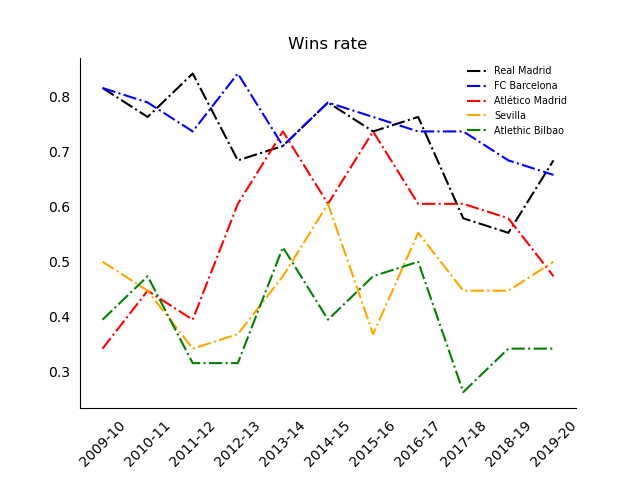

Text(0.5, 1.0, 'Wins rate')

In [10]:
# 4.3) I do the same for the Win rate

fig, ax = plt.subplots()

plt.plot(RMA_d['%W'], '-.', c = 'black')
plt.plot(BCA_d['%W'], '-.', c = 'blue')
plt.plot(ATM_d['%W'], '-.', c = 'red')
plt.plot(SEV_d['%W'], '-.', c = 'orange')
plt.plot(ATB_d['%W'], '-.', c = 'green')

plt.legend(['Real Madrid', 'FC Barcelona', 'Atlético Madrid', 'Sevilla', 'Atlethic Bilbao'], 
           loc = 1, frameon = False, fontsize = 'x-small')

plt.tick_params(top = False, bottom = False, left = False, right = False,
                labelleft = True, labelbottom = True)

plt.xticks(np.arange(11), ['2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
           '2018-19', '2019-20'], rotation = '45')

plt.subplots_adjust(bottom = 0.15)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title('Wins rate')

In [ ]:
https://es.fcstats.com/tabla,primera-division-espana,19,1,2622.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,2300.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,2032.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,1712.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,1362.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,1070.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,692.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,470.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,72.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,71.php
https://es.fcstats.com/tabla,primera-division-espana,19,1,70.php